In [1]:
import pandas as pd

In [13]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 360.1 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
#导入数据
import pandas as pd #数据表
text_ana = pd.read_csv('/Users/jiaojiao/Downloads/text_analysis_weibo.csv', index_col = 0)
# text_ana = text_ana.drop(['Unnamed: 0'],axis=1)
text_ana

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


In [20]:
#分析语料
text = list(text_ana['标题/微博内容'].dropna())
text

['#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 \u200b\u200b',
 '转发C',
 '【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待全能音乐人@刘雨昕 与#运动者联濛#一起，为冬奥赛事助力加油！】',
 '丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一锁定@北京卫视 和门面主舞@时代少年团-丁程鑫 一起过大年，拥抱冰雪，致敬冬奥！',
 '诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！',
 '转发C',
 '#熊猫守护者##全面二创冰墩墩#北京冬奥会如火如荼地进行中，滚滚我的好朋友冰墩墩也十分活跃，看滚滚我做一组舒展运动，为中国健儿加油鼓劲儿！[嘻嘻][嘻嘻] http://t.cn/A6ilerDZ 视频来源：@桃花源生态保护基金会 \u200b\u200b\u200b',
 '转发C',
 '2022北京冬奥会加油！冰墩墩雪容融也非常可爱！期待我国奥运健儿们的精彩表现[开学季]#云支教迎冬奥# \u200b\u200b',
 '和@TFBOYS-易烊千玺 一起助力东奥！一起向未来！',
 '转发C',
 '[心]',
 '守护[心]',
 '#易烊千玺邀你唱响一起向未来# //@M28号星球:#易烊千玺邀你唱响一起向未来# 26.17',
 '//@翔霖神谕:感谢@爱奇艺 的分享。新年胜旧年，春妍惹绚烂，万事胜意与平安喜乐的祝福徒增和乐，@时代少年团-严浩翔 @时代少年团-贺峻霖  同少年关注北京台春晚，拥锦瑟年华岁岁。',
 '好棒[打call][打call][打call]//@只是叭呐呐:哇晒哇晒！厉害我顶起！！！#蔡徐坤代言燕京啤酒# //@蔡徐坤的大喇叭萱:#蔡徐坤[超话]# I#蔡徐坤代言燕京啤酒# 恭喜燕京啤酒，在北京冬奥会官方赞助商冬奥营销传播声量总榜单正式发布位列第三！和代言人@蔡徐坤 一起释放活力，点燃激情，喝彩冬奥！[干杯]',
 '转发C',
 '//@杰克涛:金牌稳了[笑而不语]',
 '转发C',
 '//@许佳琪kiki:#一起冬奥吧# 中国队加油呀⛽️',
 '转发C',
 '蹲',
 '转发',
 '#周深一起向未来高音太绝了#@卡布叻_周深 录制《一起向未来》花絮来了！这漂亮的高音简直绝绝

In [21]:
import jieba

def word_segmentation(text): 
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['标题/微博内容'] = text_ana['标题/微博内容'].iloc[:100]\
                                .astype(str).apply(word_segmentation)

text_ana.head()

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,# 高校 通报 教师 图书馆 打电话 声音 过大 出言不逊 # 公道 自 在 人心 ， 谣言...,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发 C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【 # 刘雨昕 运动 者 联 濛 # 河山 覆 冰雪 ， 健儿 迎 冬奥 [ 金牌 ] 全能...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫 / / @ 丁程鑫 后援会 官博 : # 丁程鑫 [ 超话 ] # ✨ # 丁程...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶 ， 你们 真 不要脸 诶 。 。 。 没 资格 宣传 奥运 。 。 。 抵制 抵制 ！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

#初始化CountVectorizer文本向量化
vectorizer = CountVectorizer()

#将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

#展示特征矩阵的形状
print('词袋特征矩阵的形状：', X.shape)

词袋特征矩阵的形状： (49998, 1458336)


In [22]:
#展示词袋模型中的所有特征词
print('特征词列表：', vectorizer.get_feature_names_out())

特征词列表： ['00' '000' '0000' ... '𝟬𝟮𝟯' '𝟭𝟴𝟭𝟴' '𝟴𝟵𝟬𝟴']


In [23]:
list(X.toarray())

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0,

In [10]:
#获取词汇表
feature_words = vectorizer.get_feature_names_out()

#计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [24]:
#观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse = True)

[('转发c', 17173),
 ('nbsp', 14154),
 ('cn', 5447),
 ('2022', 4902),
 ('http', 4671),
 ('其中', 3694),
 ('10', 3085),
 ('同时', 3018),
 ('此外', 2777),
 ('目前', 2471),
 ('2021', 2416),
 ('11', 2397),
 ('超话', 2170),
 ('十四五', 2152),
 ('12', 1937),
 ('来源', 1889),
 ('东数西算', 1884),
 ('2021年', 1854),
 ('近日', 1795),
 ('一带一路', 1662),
 ('以上', 1617),
 ('20', 1468),
 ('30', 1453),
 ('00', 1434),
 ('15', 1410),
 ('14', 1392),
 ('近年来', 1389),
 ('13', 1384),
 ('双一流', 1301),
 ('25', 1202),
 ('亿元', 1186),
 ('发布于', 1178),
 ('不过', 1171),
 ('16', 1134),
 ('今年以来', 1126),
 ('因此', 1125),
 ('17', 1074),
 ('左右', 1024),
 ('另外', 1013),
 ('财政部', 1012),
 ('打call', 1009),
 ('重庆', 1000),
 ('21', 990),
 ('22', 981),
 ('18', 939),
 ('2020', 916),
 ('01', 908),
 ('02', 907),
 ('com', 904),
 ('03', 894),
 ('据悉', 878),
 ('23', 874),
 ('数据显示', 855),
 ('中国', 848),
 ('与此同时', 835),
 ('北京', 816),
 ('另一方面', 811),
 ('05', 798),
 ('根据', 796),
 ('今年上半年', 794),
 ('50', 793),
 ('高校通报教师图书馆打电话声音过大出言不逊', 791),
 ('19', 781),
 ('04', 776),
 ('住

# 词云图

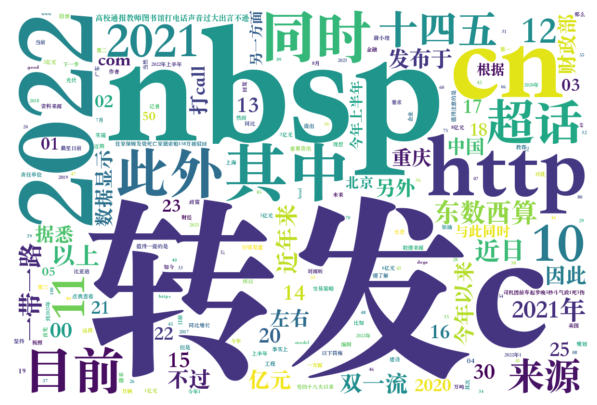

<Figure size 640x480 with 0 Axes>

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

#根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='/Users/jiaojiao/Library/Fonts/Songti.ttc'
).generate_from_frequencies(word_freq)

#显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_weibo.png', dpi=100)